In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)
def read_directory(directory_name):
    array_of_img=[]
    
    for filename in os.listdir(r"./"+directory_name):
        img = load_img(directory_name + "/" + filename, target_size=(100, 100))
        array_of_img.append(img)
    
    return array_of_img  
        
X_train_food_list = read_directory("food5k-image-dataset/training/food")
X_train_nonfood_list = read_directory("food5k-image-dataset/training/non_food")
X_test_food_list = read_directory("food5k-image-dataset/evaluation/food")
X_test_nonfood_list = read_directory("food5k-image-dataset/evaluation/non_food")
print(len(X_train_food_list))
print(len(X_train_nonfood_list))
print(len(X_test_food_list))
print(len(X_test_nonfood_list))

2000
2000
500
500


In [3]:
X_train = np.empty((len(X_train_food_list)+len(X_train_nonfood_list),100,100,3))
X_test = np.empty((len(X_test_food_list)+len(X_test_nonfood_list),100,100,3))
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)

4000
1000
(4000, 100, 100, 3)
(1000, 100, 100, 3)


In [4]:
for i in range(0,len(X_train_food_list)):
    X_train[i] = img_to_array(X_train_food_list[i])
    
for i in range(len(X_train_food_list),len(X_train_food_list) + len(X_train_nonfood_list)):
    X_train[i] = img_to_array(X_train_nonfood_list[i-len(X_train_food_list)])
    
for i in range(0,len(X_test_food_list)):
    X_test[i] = img_to_array(X_test_food_list[i])
    
for i in range(len(X_test_food_list),len(X_test_food_list) + len(X_test_nonfood_list)):
    X_test[i] = img_to_array(X_test_nonfood_list[i-len(X_test_food_list)])
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)

4000
1000
(4000, 100, 100, 3)
(1000, 100, 100, 3)


In [5]:
#執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
Y_train = np.zeros(len(X_train))
Y_test = np.zeros(len(X_test))
for i in range(0,len(X_train_food_list)):
    Y_train[i] = 1
    
for i in range(0,len(X_test_food_list)):
    Y_test[i] = 1
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(len(Y_train))
print(len(Y_test))
print(Y_train.shape)
print(Y_test.shape)

4000
1000
(4000, 2)
(1000, 2)


In [7]:
print(X_train)
print(Y_train)

[[[[0.90196078 0.70196078 0.34117647]
   [0.90980392 0.71764706 0.31372549]
   [0.94901961 0.75294118 0.31764706]
   ...
   [0.56862745 0.34117647 0.2627451 ]
   [0.51764706 0.29411765 0.25098039]
   [0.48627451 0.27058824 0.29019608]]

  [[0.85490196 0.65882353 0.30980392]
   [0.87843137 0.68235294 0.30980392]
   [0.86666667 0.6627451  0.2627451 ]
   ...
   [0.58039216 0.34901961 0.29411765]
   [0.54901961 0.3254902  0.28235294]
   [0.52941176 0.30980392 0.31372549]]

  [[0.78431373 0.60392157 0.23529412]
   [0.83921569 0.64705882 0.2745098 ]
   [0.84313725 0.64705882 0.26666667]
   ...
   [0.56078431 0.32941176 0.30588235]
   [0.56078431 0.3372549  0.29411765]
   [0.54509804 0.32156863 0.29411765]]

  ...

  [[0.60784314 0.32156863 0.01960784]
   [0.69019608 0.40392157 0.10196078]
   [0.65098039 0.38823529 0.07843137]
   ...
   [0.34901961 0.29019608 0.27058824]
   [0.30588235 0.23529412 0.14117647]
   [0.26666667 0.19607843 0.10196078]]

  [[0.85490196 0.58431373 0.18039216]
   [0.8

In [8]:
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

shuffle_in_unison_scary(X_train, Y_train)
shuffle_in_unison_scary(X_test, Y_test)

In [9]:
print(X_train)
print(Y_train)

[[[[0.52156863 0.52156863 0.3254902 ]
   [0.56862745 0.65098039 0.42745098]
   [0.49019608 0.38431373 0.27058824]
   ...
   [1.         1.         0.6745098 ]
   [0.89411765 0.84705882 0.44705882]
   [0.35294118 0.32941176 0.20392157]]

  [[0.94901961 0.93333333 0.65490196]
   [0.91764706 0.99215686 0.86666667]
   [0.39215686 0.30196078 0.18039216]
   ...
   [0.67843137 0.67843137 0.23137255]
   [0.69019608 0.62745098 0.18431373]
   [0.38039216 0.39215686 0.03529412]]

  [[0.55294118 0.5372549  0.19607843]
   [0.58039216 0.54509804 0.29019608]
   [1.         0.95686275 0.74509804]
   ...
   [0.56078431 0.56078431 0.20784314]
   [0.52941176 0.4745098  0.12941176]
   [0.83529412 0.76862745 0.69803922]]

  ...

  [[0.58039216 0.49803922 0.23529412]
   [0.46666667 0.42745098 0.21960784]
   [0.52941176 0.47058824 0.30196078]
   ...
   [0.29411765 0.19215686 0.04705882]
   [0.15686275 0.09019608 0.01176471]
   [0.79215686 0.67843137 0.41176471]]

  [[0.61176471 0.54509804 0.34117647]
   [0.3

In [10]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(100, 100, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 flatten (Flatten)           (None, 20000)             0

In [11]:
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=7, batch_size=120)

Epoch 1/7
27/27 [==============================] - 22s 806ms/step - loss: 0.5346 - accuracy: 0.7450 - val_loss: 0.4551 - val_accuracy: 0.7837
Epoch 2/7
27/27 [==============================] - 25s 953ms/step - loss: 0.4065 - accuracy: 0.8272 - val_loss: 0.4349 - val_accuracy: 0.8100
Epoch 3/7
27/27 [==============================] - 34s 1s/step - loss: 0.3547 - accuracy: 0.8472 - val_loss: 0.4104 - val_accuracy: 0.8300
Epoch 4/7
27/27 [==============================] - 23s 849ms/step - loss: 0.3405 - accuracy: 0.8519 - val_loss: 0.3496 - val_accuracy: 0.8537
Epoch 5/7
27/27 [==============================] - 29s 1s/step - loss: 0.2986 - accuracy: 0.8797 - val_loss: 0.3122 - val_accuracy: 0.8687
Epoch 6/7
27/27 [==============================] - 33s 1s/step - loss: 0.2680 - accuracy: 0.8938 - val_loss: 0.3136 - val_accuracy: 0.8625
Epoch 7/7
27/27 [==============================] - 32s 1s/step - loss: 0.2283 - accuracy: 0.9134 - val_loss: 0.2800 - val_accuracy: 0.8825


In [13]:
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


Testing ...
125/125 [==============================] - 7s 54ms/step - loss: 0.1955 - accuracy: 0.9273
訓練資料集的準確度 = 0.93
32/32 [==============================] - 2s 55ms/step - loss: 0.2998 - accuracy: 0.8780
測試資料集的準確度 = 0.88


In [14]:
# 儲存Keras模型
print("Saving Model: general.h5 ...")
model.save("general.h5")

Saving Model: general.h5 ...


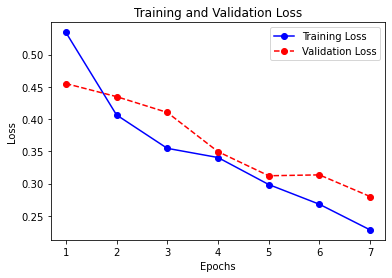

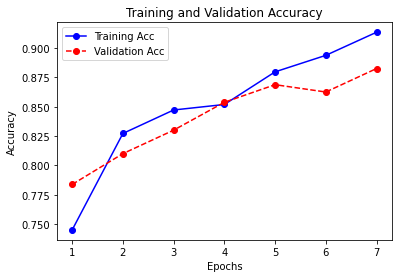

In [15]:
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(1, 100, 100, 3)


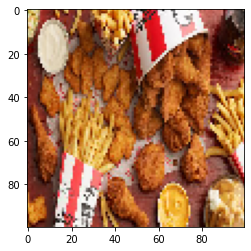

In [16]:
img = load_img("photo.jpg", target_size=(100, 100))
plt.imshow(img)
x = img_to_array(img)
x = x/255
img = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
print(img.shape)

In [17]:
result = model.predict(img)

In [18]:
print(result)
maxindex = np.argmax(result)
print(maxindex)

[[0.1378968 0.8426696]]
1
